In [2]:
from langchain_openai import ChatOpenAI

# 모델 초기화 
model = ChatOpenAI(model="gpt-4o", temperature=0.01)
model.invoke("안녕하세요!")

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 10, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_64dfa806c7', 'id': 'chatcmpl-DBgfdrYgF8aFJ7UVRkiPrl9XJQaag', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c803c-f97b-7952-a677-95c489e9c8a6-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 10, 'output_tokens': 10, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    State 클래스는 TypedDict를 상속받습니다.

    속성:
        messages (Annotated[list[str], add_messages]) : 메시지들은 "list" 타입을 가집니다.
        'add_messages' 함수는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.
        (이 경우, 메시지를 덮어쓰는 대신 리스트에 추가합니다)
    """
    messages: Annotated[list[str], add_messages]

# StateGraph 클래스를 사용하여 State 타입의 그래프 생성 
graph_builder = StateGraph(State)


In [4]:
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

import bs4
from langchain_community.document_loaders import WebBaseLoader

# 도구 함수 정의 
@tool
def get_current_time (timezone: str, location: str) -> str:
    """현재 시각을 반환하는 함수"""
    try:
        tz = pytz.timezone(timezone)
        now = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
        result = f'{timezone} ({location}) 현재 시각 {now}'
        return result
    except pytz.UnknownTimeZoneError:
        return f'알 수 없는 타임존: {timezone}'
    
@tool
def get_web_search(query: str, search_period: str="m") -> str:
    """
    웹 검색을 수행하는 함수

    Args:
        query (str): 검색어
        search_period (str): 검색 기간 (e.g., 'w' for past week(default), 'm' for past month, 'y' for past year, 'd' for past day)

    Returns:
        str: 검색 결과 
    """
    wrapper = DuckDuckGoSearchAPIWrapper(time=search_period)

    print('\n---------------WEB SEARCH-------------------')
    print(query)
    print(search_period)

    search = DuckDuckGoSearchResults(
        api_wrapper=wrapper,
        results_separator=';\n'
    )

    searched = search.invoke(query)

    for i, result in enumerate(searched.split(';\n')):
        print(f'{i+1}, {result}')

    return searched

# 도구 바인딩 
tools = [get_current_time, get_web_search]


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
tools[0].invoke({'timezone': "Asia/Seoul", 'location': "서울"})

'Asia/Seoul (서울) 현재 시각 2026-02-21 21:46:59'

In [6]:
tools[1].invoke({'query': '파이썬', "search_period": 'm'})

Impersonate 'chrome_107' does not exist, using 'random'



---------------WEB SEARCH-------------------
파이썬
m
1, snippet: 2026. 2. 9. · 파이썬은 1991년 네덜란드 컴퓨터과학자 귀도 반 로섬(Guido van Rossum)이 개발한 프로그래밍 언어입니다. 파이썬의 사전적인 의미는 비단뱀이지만 ..., title: 파이썬 기초 가이드: 파이썬 소개 - 연구학습지원 서비스 - LibGuides, link: https://sejong-kr.libguides.com/c.php?g=938119
2, snippet: 2026. 2. 1. · 이 책의 목표는 독자가 파이썬을 통해 프로그래밍에 대한 전반적인 이해를 갖게하는 것이며, 또 파이썬이라는 도구를 이용하여 원하는 프로그램을 쉽고 재미있게 만들 수 ..., title: 점프 투 파이썬 - WikiDocs - 위키독스, link: https://wikidocs.net/book/1
3, snippet: 3일 전 · [도서] 한번보고 만드는 AI가 코딩해주는 파이썬 한번보고 만드는 AI가 코딩해주는 파이썬 새창이동 ... [도서] 코딩 자율학습 나도코딩의 파이썬 입문 코딩 자율학습 나도 ..., title: 파이썬 종합 베스트 - 예스24, link: https://m.yes24.com/Category/CategoryRank/001001003022004?sumTp=b
4, snippet: 2026. 1. 28. · 업무에서 활용도가 높은 인기 있는 파이썬 라이브러리를 사용할 수 있다. 파이썬으로 PDF, HWP 파일로부터 텍스트를 추출할 수 있다. 파이썬과 DB 를 연동하고 데이터 ..., title: 어떤 데이터도 자유롭게 with 파이썬 - 멀티캠퍼스 :: 과정상세, link: https://m.multicampus.com/course/detail/FA00YY


'snippet: 2026. 2. 9. · 파이썬은 1991년 네덜란드 컴퓨터과학자 귀도 반 로섬(Guido van Rossum)이 개발한 프로그래밍 언어입니다. 파이썬의 사전적인 의미는 비단뱀이지만 ..., title: 파이썬 기초 가이드: 파이썬 소개 - 연구학습지원 서비스 - LibGuides, link: https://sejong-kr.libguides.com/c.php?g=938119;\nsnippet: 2026. 2. 1. · 이 책의 목표는 독자가 파이썬을 통해 프로그래밍에 대한 전반적인 이해를 갖게하는 것이며, 또 파이썬이라는 도구를 이용하여 원하는 프로그램을 쉽고 재미있게 만들 수 ..., title: 점프 투 파이썬 - WikiDocs - 위키독스, link: https://wikidocs.net/book/1;\nsnippet: 3일 전 · [도서] 한번보고 만드는 AI가 코딩해주는 파이썬 한번보고 만드는 AI가 코딩해주는 파이썬 새창이동 ... [도서] 코딩 자율학습 나도코딩의 파이썬 입문 코딩 자율학습 나도 ..., title: 파이썬 종합 베스트 - 예스24, link: https://m.yes24.com/Category/CategoryRank/001001003022004?sumTp=b;\nsnippet: 2026. 1. 28. · 업무에서 활용도가 높은 인기 있는 파이썬 라이브러리를 사용할 수 있다. 파이썬으로 PDF, HWP 파일로부터 텍스트를 추출할 수 있다. 파이썬과 DB 를 연동하고 데이터 ..., title: 어떤 데이터도 자유롭게 with 파이썬 - 멀티캠퍼스 :: 과정상세, link: https://m.multicampus.com/course/detail/FA00YY'

In [7]:
for tool in tools:
    print(tool.name, tool)

get_current_time name='get_current_time' description='현재 시각을 반환하는 함수' args_schema=<class 'langchain_core.utils.pydantic.get_current_time'> func=<function get_current_time at 0x00000169F399BBA0>
get_web_search name='get_web_search' description="웹 검색을 수행하는 함수\n\nArgs:\n    query (str): 검색어\n    search_period (str): 검색 기간 (e.g., 'w' for past week(default), 'm' for past month, 'y' for past year, 'd' for past day)\n\nReturns:\n    str: 검색 결과" args_schema=<class 'langchain_core.utils.pydantic.get_web_search'> func=<function get_web_search at 0x00000169F3B36C00>


In [8]:
model_with_tools = model.bind_tools(tools) # GPT 언어 모델에 도구 연결 

def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.

    매개변수:
    state (State):  현재 대화 상태를 나타내는 객체로, 이전 메시지들이 포함되어 있습니다.

    반환값: 
    dict: 모델이 생성한 응답 메시지를 포함하는 딕셔너리
          형시근 {"messages": [응답 메시지]}입니다. 
    """

    return {"messages": model_with_tools.invoke(state["messages"])}

graph_builder.add_node("generate", generate)

In [9]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
    도구를 실행하는 노드 클래스입니다. 마지막 AIMessage에서 요청된 도구를 실행합니다.
    Attributes:
        tools_by_name (dict): 도구 이름을 키로 하고 도구 객체를 값으로 가지는 사전입니다.
    Methods:
        __init__(tools: list): 도구 객체들의 리스트를 받아서 초기화합니다.
        __call__(inputs: dict): 입력 메시지를 받아서 도구를 실행하고 결과 메시지를 반환합니다.
    """

    """A node that runs the tools requested in the last AIMessages."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message= messages[-1]
        else:
            raise ValueError("No message found in input")
        
        outputs = []

        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call['name']].invoke(tool_call['args'])
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call['name'],
                    tool_call_id=tool_call['id']
                )
            )

        return {"messages": messages + outputs}
    
tool_node = BasicToolNode(tools=tools)

graph_builder.add_node('tools', tool_node)

In [10]:
def route_tools(state: State):
    """
    마지막 메시지에 도구 호출이 있는 경우 ToolNode로 라우팅하고,
    그렇지 않은 경우 끝으로 라우팅하기 위해 conditional_edge에서 사용합니다.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages:= state.get('messages', []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"tool_edge 입력 상태에서 메시지를 찾을 수 없습니다: {state}")
    
    if hasattr(ai_message, 'tool_calls') and len(ai_message.tool_calls) > 0 :
        return "tools"

    return END

graph_builder.add_edge(START, 'generate')

graph_builder.add_conditional_edges(
    "generate",
    route_tools,
    {'tools': "tools", END: END}
)

graph_builder.add_edge('tools', "generate")
graph = graph_builder.compile()

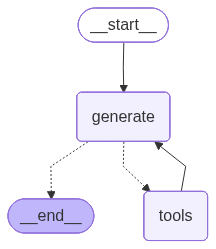

In [11]:
from IPython.display import Image, display
try: 
    display(Image(graph.get_graph().draw_mermaid_png()))

except Exception:
    pass

In [12]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content="지금 서울 몇 시야")]

gathered = None

for msg, metadata in graph.stream({"messages": inputs}, stream_mode='messages'):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end="")

        if gathered is None:
            gathered = msg
        else:
            gathered = gathered + msg

gathered

지금 서울의 시간은 2026년 2월 21일 21시 52분입니다.

AIMessageChunk(content='지금 서울의 시간은 2026년 2월 21일 21시 52분입니다.', additional_kwargs={}, response_metadata={'model_provider': 'openai', 'finish_reason': 'tool_callsstop', 'model_name': 'gpt-4o-2024-08-06gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a2afb0f9e7fp_64dfa806c7', 'service_tier': 'defaultdefault'}, id='lc_run--019c8042-75ed-7003-8635-bf0bae7761ee', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': '서울'}, 'id': 'call_U9kp3FnqjKtm0G7vZYpFv1vw', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 368, 'output_tokens': 47, 'total_tokens': 415, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"서울"}', 'id': 'call_U9kp3FnqjKtm0G7vZYpFv1vw', 'index': 0, 'type': 'tool_call_chunk'}], chunk_position='last')

In [13]:
from langchain_core.messages import AIMessageChunk, SystemMessage

about = '서울 월드컵 경기장 잔디 문제'

inputs = [SystemMessage(content=f"""
너는 신문기자이다.
최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.

- 최근 어떤 이슈가 있었는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘.
- 그 내용으로 원고를 작성하기 우한 목차를 만들고, 목차 내용을 채우기 우해 추가로 검색할 내용을 리스트로 정리해봐.
- 검색할 리스트를 토대로 재검색해.
- 목차에 있는 내용을 작성하기 우해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해.
- 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋아.

더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성한다. 
제목, 부제, 리드문, 본문의 구성으로 작성한다. 본문 내용은 심층 분석 기사에 맞게 구체적이고 깊이 있게 작성한다. 

""")]

for msg, metadata in graph.stream({'messages': inputs}, stream_mode='messages'):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end="")


---------------WEB SEARCH-------------------
서울 월드컵 경기장 잔디 문제
m
1, snippet: 3 weeks ago - 경기 일정은 2026년 캐나다식 풋볼 리그 시즌과 겹치므로 토론토 아고노츠와 BC 라이온스의 일정 충돌과 홈 경기 손실이 발생할 수 있다 경기 일정은 또한 홈 경기장이 월드컵 경기장 근처에 있는 메이저리그의 캔자스시티 로열스, 필라델피아 필리스, 시애틀 매리너스, 텍사스 레인저스의 일정에도 영향을 미칩니다, title: 2026년 FIFA 월드컵 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/2026년_FIFA_월드컵
2, snippet: 1 month ago - 2015년 국제축구연맹 부패 사건을 계기로 2022년 FIFA 월드컵 유치 과정에 연루된 축구인 상당수가 미국 당국의 조사를 받았다. 카타르는 유치 과정에서 중동의 더운 기후 문제에 대해 모든 경기장에 에어컨을 설치하겠다는 ..., title: 2022년 FIFA 월드컵 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/2022년_FIFA_월드컵
3, snippet: 3 weeks ago - KSPO DOME(케이스포 돔, 올림픽체조경기장)은 대한민국 서울특별시 올림픽공원에 있는 실내 경기장이자 대형 공연장이다. 총 좌석 수는 14,730개이다. 1988년 서울 올림픽을 위해 1984년 8월 31일부터 1986년 4월 30일까지 공사를 ..., title: 올림픽체조경기장 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/올림픽체조경기장
4, snippet: 1 week ago - 유성구 월드컵경기장 주차장을 자주 이용하자 월드타임스, title: 유성구 월드컵경기장 주차장을 자주 이용하자 | 월드타임스, link: https://worldtimes.info/View.aspx?No=3